# Ciência de Dados - Prática 1
#### David
#### Nilson Tinassi Peres
Banco de Dados: Resultados Preliminar Censo 2022 + Tabela 2.9 - População residente em 2000 e população residente em 2010, por situação do domicílio, com indicação da população urbana residente na sede municipal, área total e densidade demográfica, segundo as mesorregiões, as microrregiões e os municípios.


#### Hipóteses:
1. A população da maioria das cidades brasileiras acompanhou a taxa de crescimento anual global desde 2010
REF: https://population.un.org/wpp/Download/Standard/MostUsed/
Dados: 
{
2010: 1.25,
2011: 1.24,
2012: 1.25,
2013: 1.22,
2014: 1.21,
2015: 1.17,
2016: 1.16,
2018: 1.13,
2019: 1.07,
2020: 1.03,
2021: 0.92,
2022: 0.82}
2. As 10 cidades que mais cresceram no período de 2000 a 2010, também foram as que mais cresceram no período de 2010 a 2022.
3. As 10 cidades com maior evasão no período de 2000 a 2010 também foram as que tiveram maior evasão de 2010 a 2022.

#### Atributos:
1. Aumento00-10: Aumento relativo do município entre os anos de 2000 a 2010.
2. Aumento10-22: Aumento relativo do município entre os anos de 2010 a 2022.
3. DivergênciaGlobal: Diferença relativa entre a população atual do município e a população esperada com base na taxa de crescimento global da população

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.precision", 2)

In [21]:
censo2022 = pd.read_excel('POP2022_Municipios.xls', skiprows=[0])
censo2022.columns = ['UF', 'COD. UF', 'COD. MUNIC', 'MUNIC', 'População 2022']
censo2022 = censo2022[['UF', 'MUNIC', 'População 2022']]
censo2022 = censo2022[censo2022['UF'] == 'SP']
censo2022.tail()

,UF,MUNIC,População 2022
3907,SP,Votorantim,137319
3908,SP,Votuporanga,96795
3909,SP,Zacarias,2680
3910,SP,Chavantes,12090
3911,SP,Estiva Gerbi,11394


In [22]:
censo2010 = pd.read_excel('tab2_9_20SaoPaulo.xls', skiprows=[0])
censo2010.columns = ['MUNIC', 'População 2000', 'População 2010', 'Urbana', 'Na sede municipal', 'Rural', 'Área', 'Densidade', 'Cód']
censo2010 = censo2010[['MUNIC', 'População 2000', 'População 2010', 'Área']]
censo2010.tail()

,MUNIC,População 2000,População 2010,Área
640,Vista Alegre do Alto,4754,6886,94.98
641,Vitória Brasil,1675,1737,49.70
642,Votorantim,95925,108809,183.65
643,Votuporanga,75641,84692,424.12
644,Zacarias,1947,2335,319.14


In [23]:
yearly_growing_rate_brazil = \
{2010: 0.94, 2011: 0.92, 2012: 0.88, 2013: 0.86, 2014: 0.86, 2015: 0.83, 
 2016: 0.79, 2017: 0.79, 2018: 0.79, 2019: 0.74, 2020: 0.59, 2021: 0.47}

yearly_growing_rate_global = \
{2010: 1.25, 2011: 1.24, 2012: 1.25, 2013: 1.22, 2014: 1.21, 2015: 1.17,
2016: 1.16, 2018: 1.13, 2019: 1.07, 2020: 1.03, 2021: 0.92, 2022: 0.82}


In [24]:
censo2022 = censo2022.set_index('MUNIC').join(censo2010.set_index('MUNIC')).dropna()
censo_completo = censo2022[['População 2000', 'População 2010', 'População 2022', 'Área']]
print(censo_completo.dtypes)
censo_completo.head()

População 2000    float64
População 2010    float64
População 2022     object
Área              float64
dtype: object


,População 2000,População 2010,População 2022,Área
MUNIC,,,,
Adamantina,33497.0,33797.0,34357,411.36
Adolfo,3684.0,3557.0,4339,211.08
Aguaí,28195.0,32148.0,31561,474.74
Águas da Prata,7131.0,7584.0,7075,142.96
Águas de Lindóia,16190.0,17266.0,18859,60.13


In [25]:
censo_completo['População 2000'] = pd.to_numeric(censo_completo['População 2000'])
censo_completo['População 2010'] = pd.to_numeric(censo_completo['População 2010'])
censo_completo['População 2022'] = pd.to_numeric(censo_completo['População 2022'])

/var/folders/43/64r54w9j45jb6lz9ycskc2zw0000gn/T/ipykernel_2826/2437193354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censo_completo['População 2000'] = pd.to_numeric(censo_completo['População 2000'])
/var/folders/43/64r54w9j45jb6lz9ycskc2zw0000gn/T/ipykernel_2826/2437193354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censo_completo['População 2010'] = pd.to_numeric(censo_completo['População 2010'])
/var/folders/43/64r54w9j45jb6lz9ycskc2zw0000gn/T/ipykernel_2826/2437193354.py:3: SettingWith

In [26]:
censo_completo['Aumento00-10'] = (censo_completo['População 2010'] - censo_completo['População 2000'])/censo_completo['População 2000']*100
censo_completo['Aumento10-22'] = (censo_completo['População 2022'] - censo_completo['População 2010'])/censo_completo['População 2010']*100

In [27]:
censo_completo

,População 2000,População 2010,População 2022,Área,Aumento00-10,Aumento10-22
MUNIC,,,,,,
Adamantina,33497.0,33797.0,34357,411.36,0.90,1.66
Adolfo,3684.0,3557.0,4339,211.08,-3.45,21.98
Aguaí,28195.0,32148.0,31561,474.74,14.02,-1.83
Águas da Prata,7131.0,7584.0,7075,142.96,6.35,-6.71
Águas de Lindóia,16190.0,17266.0,18859,60.13,6.65,9.23
...,...,...,...,...,...,...
Votorantim,95925.0,108809.0,137319,183.65,13.43,26.20
Votuporanga,75641.0,84692.0,96795,424.12,11.97,14.29
Zacarias,1947.0,2335.0,2680,319.14,19.93,14.78


In [28]:
print(censo_completo.loc[['Ribeirão Preto', 'São Carlos', 'Batatais', 'Orlândia', 'Franca', 'Altinópolis']])

                População 2000  População 2010  População 2022     Área  \
MUNIC                                                                     
Ribeirão Preto        504923.0        604682.0          702739   651.28   
São Carlos            192998.0        221950.0          256898  1137.30   
Batatais               51112.0         56476.0           59342   849.53   
Orlândia               36004.0         39781.0           37916   291.77   
Franca                287737.0        318640.0          370378   605.68   
Altinópolis            15481.0         15607.0           16845   929.84   

                Aumento00-10  Aumento10-22  
MUNIC                                       
Ribeirão Preto         19.76         16.22  
São Carlos             15.00         15.75  
Batatais               10.49          5.07  
Orlândia               10.49         -4.69  
Franca                 10.74         16.24  
Altinópolis             0.81          7.93  


In [29]:
censo_completo['População Esperada'] = censo_completo['População 2010']
for year, rate in yearly_growing_rate_global.items():
    censo_completo['População Esperada'] = (100+rate)/100*censo_completo['População Esperada']

censo_completo['DivergenciaRel'] = (censo_completo['População Esperada'] - censo_completo['População 2022'])/censo_completo['População 2022']
censo_completo = censo_completo[['População 2000', 'População 2010', 'População 2022', 'População Esperada', 'Área', 'Aumento00-10', 'Aumento10-22', 'DivergenciaRel']]
censo_completo.loc[['Ribeirão Preto', 'São Carlos', 'Batatais', 'Orlândia', 'Franca', 'Altinópolis']].head(6)

,População 2000,População 2010,População 2022,População Esperada,Área,Aumento00-10,Aumento10-22,DivergenciaRel
MUNIC,,,,,,,,
Ribeirão Preto,504923.0,604682.0,702739,691347.08,651.28,19.76,16.22,-0.02
São Carlos,192998.0,221950.0,256898,253760.63,1137.30,15.00,15.75,-0.01
Batatais,51112.0,56476.0,59342,64570.33,849.53,10.49,5.07,0.09
Orlândia,36004.0,39781.0,37916,45482.55,291.77,10.49,-4.69,0.20
Franca,287737.0,318640.0,370378,364308.57,605.68,10.74,16.24,-0.02
Altinópolis,15481.0,15607.0,16845,17843.85,929.84,0.81,7.93,0.06


Quantidade de Municípios que Seguiram a taxa de Crescimento Global de 2010 a 2022
YES    490
NO     149
Name: TxCrescHip, dtype: int64
Percentual de Municípios que Seguiram a taxa de Crescimento Global de 2010 a 2022
YES    76.68
NO     23.32
Name: TxCrescHip, dtype: float64


/var/folders/43/64r54w9j45jb6lz9ycskc2zw0000gn/T/ipykernel_2826/272270618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censo_completo['TxCrescHip'] = censo_completo['DivergenciaRel'].apply(lambda x: 'NO' if x > -0.05 and x<0.05 else 'YES')


<Axes: >

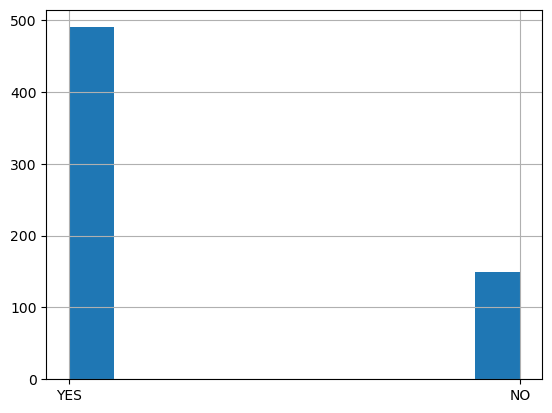

In [30]:
# Hipótese 1: A população da maioria das cidades brasileiras acompanhou a taxa de crescimento anual global desde 2010
# Para essa hipóstese será considerado:
# Taxa de Crescimento Municipal acompanhou a média global --- TxCrescHip --- SIM se discrepância % < 5%, NÃO caso contrário.
# A Hipótese será aceita se pelo menos 70% dos municípios SIM
censo_completo['TxCrescHip'] = censo_completo['DivergenciaRel'].apply(lambda x: 'NO' if x > -0.05 and x<0.05 else 'YES')
print('Quantidade de Municípios que Seguiram a taxa de Crescimento Global de 2010 a 2022')
print(censo_completo['TxCrescHip'].value_counts())

print('Percentual de Municípios que Seguiram a taxa de Crescimento Global de 2010 a 2022')
print(censo_completo['TxCrescHip'].value_counts()/censo_completo['TxCrescHip'].count()*100)

censo_completo['TxCrescHip'].hist()

In [31]:
# Hipótese 1: A população da maioria das cidades brasileiras acompanhou a taxa de crescimento anual global desde 2010
# Para essa hipóstese será considerado:
# Taxa de Crescimento Municipal acompanhou a média global --- TxCrescHip --- SIM se discrepância % < 5%, NÃO caso contrário.
# A Hipótese será aceita se pelo menos 70% dos municípios SIM

result = censo_completo['TxCrescHip'].value_counts()/censo_completo['TxCrescHip'].count()*100
if result['YES'] > 70:
    print('HIPÓTESE 1: CONFIRMADA')
else:
    print('HIPÓTESE 1: NEGADA')

HIPÓTESE 1: CONFIRMADA


In [32]:
# Hipótese 2: As 10 cidades que mais cresceram no período de 2000 a 2010, estão entre as 50 que mais cresceram no período subsequente
top10_0010 = censo_completo.sort_values(by='Aumento00-10', ascending=False)[:10].index.to_list()
top50_1022 = censo_completo.sort_values(by='Aumento10-22', ascending=False)[:50].index.to_list()

print(top10_0010)
print(top50_1022)

count=0
result = np.sum([count+1 for munic in top10_0010 if munic in top50_1022])*10
#for munic in top10_0010 :
#    if munic in top50_1022:
#        print(munic)

if result == 100:
    print('HIPÓTESE 2: CONFIRMADA')
else:
    print('HIPÓTESE 2: NEGADA')

['Balbinos', 'Iaras', 'Pracinha', 'Itupeva', 'Lavínia', 'Paulínia', 'Bertioga', 'Luís Antônio', 'Engenheiro Coelho', 'Holambra']
['Bady Bassitt', 'Jarinu', 'Itupeva', 'Cajamar', 'Nova Independência', 'Santana de Parnaíba', 'Cedral', 'Ilha Comprida', 'Ipiguá', 'Canitar', 'Louveira', 'Cotia', 'Holambra', 'Parisi', 'Barueri', 'Iperó', 'Paulínia', 'Monte Mor', 'Mairiporã', 'Jaguariúna', 'Taquarivaí', 'Ilhabela', 'Atibaia', 'Jaci', 'Salto', 'Bertioga', 'Boituva', 'Rubinéia', 'Narandiba', 'Mendonça', 'Araçariguama', 'Igaratá', 'Indaiatuba', 'Mongaguá', 'Praia Grande', 'Caraguatatuba', 'Potirendaba', 'Pirapora do Bom Jesus', 'Arujá', 'Capela do Alto', 'Nazaré Paulista', 'Cosmorama', 'Vinhedo', 'Valentim Gentil', 'Engenheiro Coelho', 'Hortolândia', 'Pereiras', 'Pardinho', 'Águas de Santa Bárbara', 'Votorantim']
HIPÓTESE 2: NEGADA


In [33]:
# Hipótese 3: As 10 cidades com maior evasão no período de 2000 a 2010, estão entre as 50 que maior evasão no período subsequente
bot10_0010 = censo_completo.sort_values(by='Aumento00-10', ascending=True)[:10].index.to_list()
bot50_1022 = censo_completo.sort_values(by='Aumento10-22', ascending=True)[:50].index.to_list()

print(bot10_0010)
print(bot50_1022)

count=0
result = np.sum([count+1 for munic in bot10_0010 if munic in bot50_1022])*10
for munic in bot10_0010 :
    if munic in bot50_1022:
        print(munic)

if result == 100:
    print('HIPÓTESE 3: CONFIRMADA')
else:
    print('HIPÓTESE 3: NEGADA')

['Flora Rica', 'Rosana', 'Turmalina', 'Nova Canaã Paulista', 'Riversul', 'Ribeirão Branco', 'Santana da Ponte Pensa', 'Cruzália', 'Arco-Íris', 'Uru']
['Gastão Vidigal', 'Euclides da Cunha Paulista', 'Nova Luzitânia', 'São Sebastião da Grama', 'Queluz', 'Rincão', 'Coronel Macedo', 'Flora Rica', 'Santa Lúcia', 'Barbosa', 'Turmalina', 'Tejupá', 'Paulo de Faria', 'Gália', 'Palmares Paulista', 'Guaraçaí', 'Santo Anastácio', 'Rosana', 'Murutinga do Sul', 'Mariápolis', 'Altair', 'Ariranha', 'Guzolândia', 'Piquete', 'Marinópolis', 'Nhandeara', 'Pracinha', 'Lupércio', 'Severínia', 'Lourdes', 'Glicério', 'Itapura', "Aparecida d'Oeste", 'Ribeirão Bonito', 'Torre de Pedra', 'Irapuru', 'Mirante do Paranapanema', 'São José da Bela Vista', 'Riversul', 'Floreal', 'Caiabu', 'Santópolis do Aguapeí', 'Monções', 'Ribeirão dos Índios', 'Caconde', 'Eldorado', 'Cruzália', 'Juquitiba', 'Avaí', 'Ribeira']
Flora Rica
Rosana
Turmalina
Riversul
Cruzália
HIPÓTESE 3: NEGADA


1. Baseado na descrição do conjunto de dados formule algumas hipótese, perguntas que você acha que podem ser respondidas/entendidas com este conjunto de dados. Tente formular até 3 questões. Numere cada questão.
    1. A população da maioria das cidades brasileiras acompanhou a taxa de crescimento anual global desde 2010
    - CONFIRMADA
    2. As 10 cidades que mais cresceram no período de 2000 a 2010, também foram as que mais cresceram no período de 2010 a 2022.
    - NEGADA
    3. As 10 cidades com maior evasão no período de 2000 a 2010 também foram as que tiveram maior evasão de 2010 a 2022.
    - NEGADA

3 - Exiba o mapa de calor (heatmap) correspondente da matriz de correlação.

<Axes: >

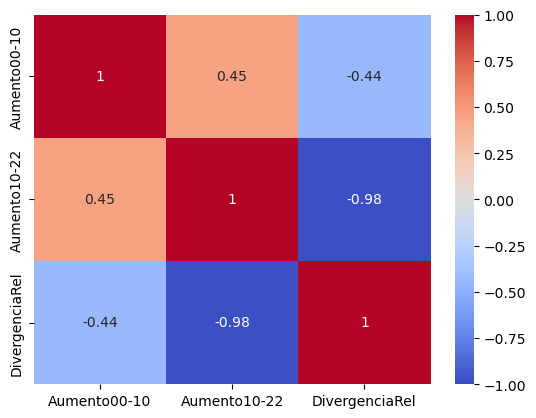

In [34]:
corr = censo_completo[['Aumento00-10', 'Aumento10-22', 'DivergenciaRel']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

4 - Faça uma análise exploratória com as medidas vistas em aula (média, mediana, moda, obliquidade e kurtose) nos atributos anteriormente selecionados. Explique quais medidas ajudam no entendimento do conjunto de dados. Sinta-se livre para utilizar outras medidas, mas explique porque você está usando elas. Se achar necessário, pode utilizar mais atributos na análise.

In [56]:
display(censo_completo[['Aumento00-10', 'Aumento10-22', 'DivergenciaRel']].describe())
print('Skewness')
display(censo_completo[['Aumento00-10', 'Aumento10-22', 'DivergenciaRel']].skew())
print('Kurtosis')
display(censo_completo[['Aumento00-10', 'Aumento10-22', 'DivergenciaRel']].kurt())


,Aumento00-10,Aumento10-22,DivergenciaRel
count,639.00,639.00,6.39e+02
mean,11.71,7.11,8.25e-02
std,15.52,13.36,1.23e-01
min,-19.52,-22.87,-3.81e-01
25%,2.94,-1.68,7.77e-03
50%,9.37,4.87,9.02e-02
75%,16.75,13.45,1.63e-01
max,181.95,84.83,4.82e-01


Skewness


Aumento00-10      3.38
Aumento10-22      1.29
DivergenciaRel   -0.33
dtype: float64

Kurtosis


Aumento00-10      26.67
Aumento10-22       3.19
DivergenciaRel     0.41
dtype: float64

5 - Exiba o histograma correspondente a cada um dos atributos escolhidos.

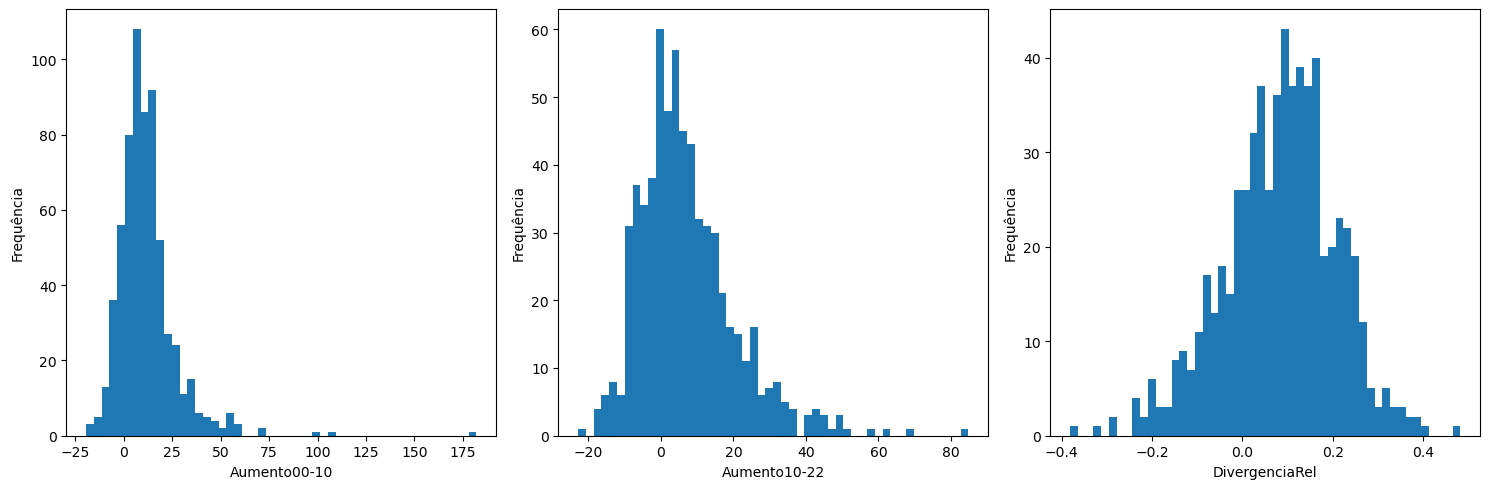

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

i=0
for atr in ['Aumento00-10', 'Aumento10-22', 'DivergenciaRel']:
    censo_completo[atr].plot(kind='hist', bins=50, ax=ax[i])
    ax[i].set_xlabel(atr)
    ax[i].set_ylabel('Frequência')
    i = i+1
    
plt.tight_layout()
plt.show()

6 - Faça o boxplot correspondente a cada um dos atributos escolhidos.

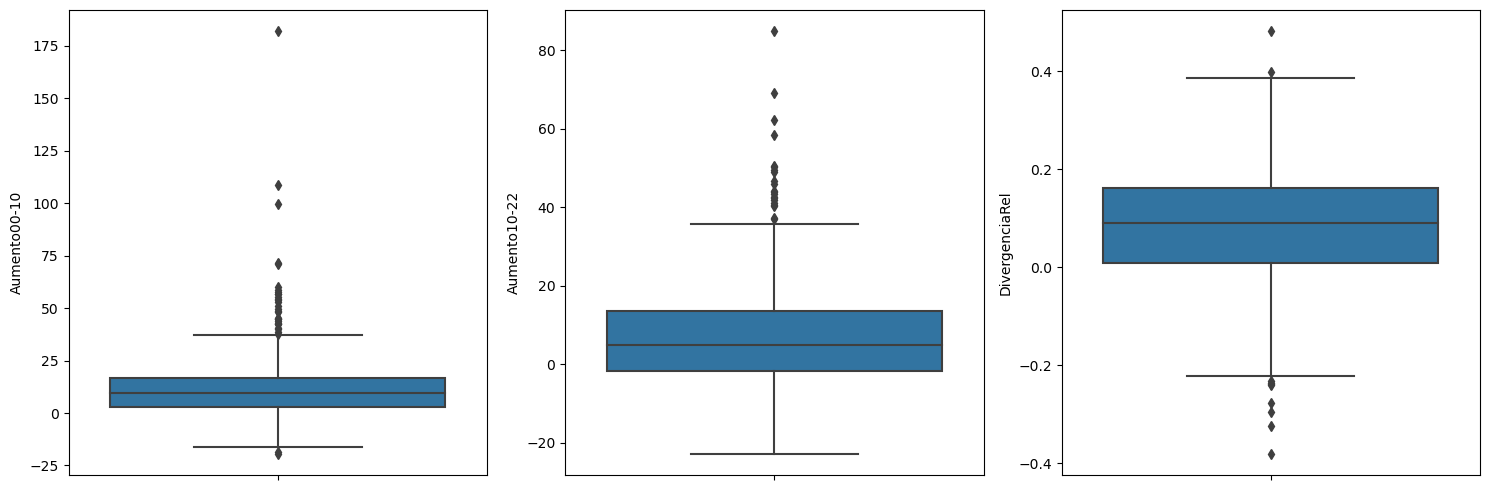

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

i=0
for atr in ['Aumento00-10', 'Aumento10-22', 'DivergenciaRel']:
    sns.boxplot(data=censo_completo, y=atr, ax=ax[i])
    ax[i].set_ylabel(atr)
    i = i+1
    
plt.tight_layout()
plt.show()

7 - Detectar se existem outliers. Se existirem, quais são eles?

In [46]:
for atr in ['Aumento00-10', 'Aumento10-22', 'DivergenciaRel']:
    quartil3 = censo_completo[atr].quantile(0.75)
    quartil1 = censo_completo[atr].quantile(0.25)
    interquartil = quartil3 - quartil1
    cerca_inferior = quartil1 - 1.5*interquartil
    cerca_superior = quartil3 + 1.5*interquartil

    outliers = censo_completo[(censo_completo[atr] < cerca_inferior) | (censo_completo[atr] > cerca_superior)]
    print(atr)
    display(outliers)

Aumento00-10


,População 2000,População 2010,População 2022,População Esperada,Área,Aumento00-10,Aumento10-22,DivergenciaRel,TxCrescHip
MUNIC,,,,,,,,,
Águas de São Pedro,1883.0,2707.0,3097,3094.98,5.37,43.76,14.41,-6.53e-04,NO
Araçariguama,11154.0,17080.0,22673,19527.96,146.34,53.13,32.75,-1.39e-01,YES
Araçoiaba da Serra,19816.0,27299.0,32922,31211.59,255.45,37.76,20.60,-5.20e-02,YES
Balbinos,1313.0,3702.0,3886,4232.58,91.64,181.95,4.97,8.92e-02,YES
Bertioga,30039.0,47645.0,64018,54473.64,490.03,58.61,34.36,-1.49e-01,YES
Boituva,34368.0,48314.0,64799,55238.53,248.95,40.58,34.12,-1.48e-01,YES
Bom Jesus dos Perdões,13313.0,19708.0,24365,22532.62,107.65,48.04,23.63,-7.52e-02,YES
Engenheiro Coelho,10033.0,15721.0,20119,17974.19,109.94,56.69,27.98,-1.07e-01,YES
Flora Rica,2177.0,1752.0,1487,2003.10,225.30,-19.52,-15.13,3.47e-01,YES


Aumento10-22


,População 2000,População 2010,População 2022,População Esperada,Área,Aumento00-10,Aumento10-22,DivergenciaRel,TxCrescHip
MUNIC,,,,,,,,,
Bady Bassitt,11550.0,14603.0,26991,16695.95,108.54,26.43,84.83,-0.38,YES
Barueri,208281.0,240749.0,342613,275253.96,66.14,15.59,42.31,-0.20,YES
Cajamar,50761.0,64114.0,101500,73303.04,131.40,26.31,58.31,-0.28,YES
Canitar,3481.0,4369.0,6369,4995.18,57.23,25.51,45.78,-0.22,YES
Cedral,6700.0,7972.0,11922,9114.57,197.43,18.99,49.55,-0.24,YES
Cotia,148987.0,201150.0,289622,229979.50,323.10,35.01,43.98,-0.21,YES
Holambra,7211.0,11299.0,16194,12918.41,65.58,56.69,43.32,-0.20,YES
Ilha Comprida,6704.0,9025.0,13447,10318.49,188.40,34.62,49.00,-0.23,YES
Iperó,18384.0,28300.0,40132,32356.05,170.05,53.94,41.81,-0.19,YES


DivergenciaRel


,População 2000,População 2010,População 2022,População Esperada,Área,Aumento00-10,Aumento10-22,DivergenciaRel,TxCrescHip
MUNIC,,,,,,,,,
Bady Bassitt,11550.0,14603.0,26991,16695.95,108.54,26.43,84.83,-0.38,YES
Cajamar,50761.0,64114.0,101500,73303.04,131.40,26.31,58.31,-0.28,YES
Cedral,6700.0,7972.0,11922,9114.57,197.43,18.99,49.55,-0.24,YES
Euclides da Cunha Paulista,10214.0,9585.0,7831,10958.75,575.21,-6.16,-18.30,0.40,YES
Gastão Vidigal,3586.0,4193.0,3234,4793.95,180.94,16.93,-22.87,0.48,YES
Ilha Comprida,6704.0,9025.0,13447,10318.49,188.40,34.62,49.00,-0.23,YES
Itupeva,26166.0,44859.0,72711,51288.34,200.75,71.44,62.09,-0.29,YES
Jarinu,17041.0,23847.0,40302,27264.83,207.64,39.94,69.00,-0.32,YES
Nova Independência,2063.0,3068.0,4619,3507.72,265.78,48.72,50.55,-0.24,YES


8 - Após a análise exploratória reanalise as hipóteses/questões e comente se elas já podem ser respondidas, se elas não fazem mais sentido, eventualmente se elas podem ser reformuladas para questões

Com base nos 3 atributos analisados e nas 3 hipóteses formuladas, foi possível observar que a primeira hipótese (relação entre o crescimento das cidades brasileiras e o crescimento da população global) pôde ser confirmada com razoável certeza, inclusive através da correlação de 98% entre o atributo Aumento10-22 que indica o aumento da população brasileira entre 2010 e 2022 e o atributo DivergênciaRel que indica a diferença relativa entre o aumento observado e o aumento esperado considerando a taxa de crescimento global.
Para as duas outras hipóteses, observou-se que foram negadas no primeiro momento, já que não se observou um comportamento de crescimento contínuo do primeiro período para o segundo e nem de evasão/redução contínua entre o primeiro período e o segundo (2000-2010 / 2010-2022).
Tanto os histogramas quanto os boxplots permitem também observar que para os três atributos a distribuição foi similar, com uma maior concentração em torno do zero, deslocado à direita. Isso indica que a tendência das cidades ao longo dos anos é de terem um pequeno na sua população, com exceção de algumas que apresentam redução/evasão e de outras que apresentam um crescimento acima do esperado.